# Comparison of one-canyon runs

* No repeats, these experiments were done 3 on the same day but they are not repeats of each other
* Parameters can be found on google drive sheet lab_speadsheets/exp_list

Using calibration from August 17th (closest calibration when all probes were connected).


In [1]:
import cmocean as cmo
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(15, color=col, linestyle=':')
    ax.axvline(21.0+15, color=col, linestyle=':')
    ax.axvline(71.0+15, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

In [5]:
# Dictionaries:

S01 = {"date": "19Aug19",
       "Nsb": 1.82 ,
       "Nshelf": 1.82,
       "fo": 0.7 ,
       "U":0.365 ,
       "run_num": 1,
       "dir": '../experiments/exp_19aug19/',
       "run_files":['04_experiment1.mat'],
       "color":'mediumseagreen',
       "rho_top":[1.015670],
       "rho_sb":[1.02559],
       "rho_bot":[1.04188],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S02 = {"date": "19Aug19",
       "Nsb": 1.59 ,
       "Nshelf": 1.59,
       "fo": 0.7 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_19aug19/',
       "run_files":['08_experiment2.mat'],
       "color":'mediumseagreen',
       "rho_top":[1.01820],
       "rho_sb":[1.02577],
       "rho_bot":[1.04109],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S03 = {"date": "19Aug19",
       "Nsb": 1.47 ,
       "Nshelf": 1.47,
       "fo": 0.7 ,
       "U":0.625 ,
       "run_num": 1,
       "dir": '../experiments/exp_19aug19/',
       "run_files":['11_experiment3.mat'],
       "color":'mediumseagreen',
       "rho_top":[1.018614],
       "rho_sb":[1.02495],
       "rho_bot":[1.04151],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S04 = {"date": "20Aug19",
       "Nsb": 1.5 ,
       "Nshelf": 1.5,
       "fo": 0.8 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_20aug19/',
       "run_files":['04_experiment1.mat'],
       "color":'navy',
       "rho_top":[1.01037],
       "rho_sb":[1.01686],
       "rho_bot":[1.02693],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S05 = {"date": "20Aug19",
       "Nsb": 1.62 ,
       "Nshelf": 1.62,
       "fo": 0.8 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_20aug19/',
       "run_files":['08_experiment2.mat'],
       "color":'navy',
       "rho_top":[1.01086],
       "rho_sb":[1.01662],
       "rho_bot":[1.027402],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S06 = {"date": "20Aug19",
       "Nsb": 1.4 ,
       "Nshelf": 1.4,
       "fo": 0.8 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_20aug19/',
       "run_files":['12_experiment3.mat'],
       "color":'navy',
       "rho_top":[1.01098],
       "rho_sb":[1.01666],
       "rho_bot":[1.02743],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S07 = {"date": "21Aug19",
       "Nsb": 1.24 ,
       "Nshelf": 1.24,
       "fo": 0.5 ,
       "U":0.25 ,
       "run_num": 1,
       "dir": '../experiments/exp_21aug19/',
       "run_files":['04_experiment1.mat'],
       "color":'pink',
       "rho_top":[1.01165],
       "rho_sb":[1.01621],
       "rho_bot":[1.02672],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S08 = {"date": "21Aug19",
       "Nsb": 1.29 ,
       "Nshelf": 1.29,
       "fo": 0.5 ,
       "U":0.375 ,
       "run_num": 1,
       "dir": '../experiments/exp_21aug19/',
       "run_files":['07_experiment2.mat'],
       "color":'pink',
       "rho_top":[1.01192],
       "rho_sb":[1.01685],
       "rho_bot":[1.02513],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }

S09 = {"date": "21Aug19",
       "Nsb": 1.18 ,
       "Nshelf": 1.18,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_21aug19/',
       "run_files":['11_experiment3.mat'],
       "color":'pink',
       "rho_top":[1.01214],
       "rho_sb":[1.01627],
       "rho_bot":[1.02589],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
        }


In [6]:
exp_dicts = [S01, S02, S03, S04, S05, S06, S07,S08,S09]
exp_num = len(exp_dicts) # number of experiment dictionaries

colors = ['teal','darkorange','yellowgreen', 'tan']

### READINGS

../experiments/exp_19aug19/04_experiment1.mat
../experiments/exp_19aug19/08_experiment2.mat
../experiments/exp_19aug19/11_experiment3.mat
../experiments/exp_20aug19/04_experiment1.mat
../experiments/exp_20aug19/08_experiment2.mat
../experiments/exp_20aug19/12_experiment3.mat
../experiments/exp_21aug19/04_experiment1.mat
../experiments/exp_21aug19/07_experiment2.mat
../experiments/exp_21aug19/11_experiment3.mat


Text(0.5,0,'time / s')

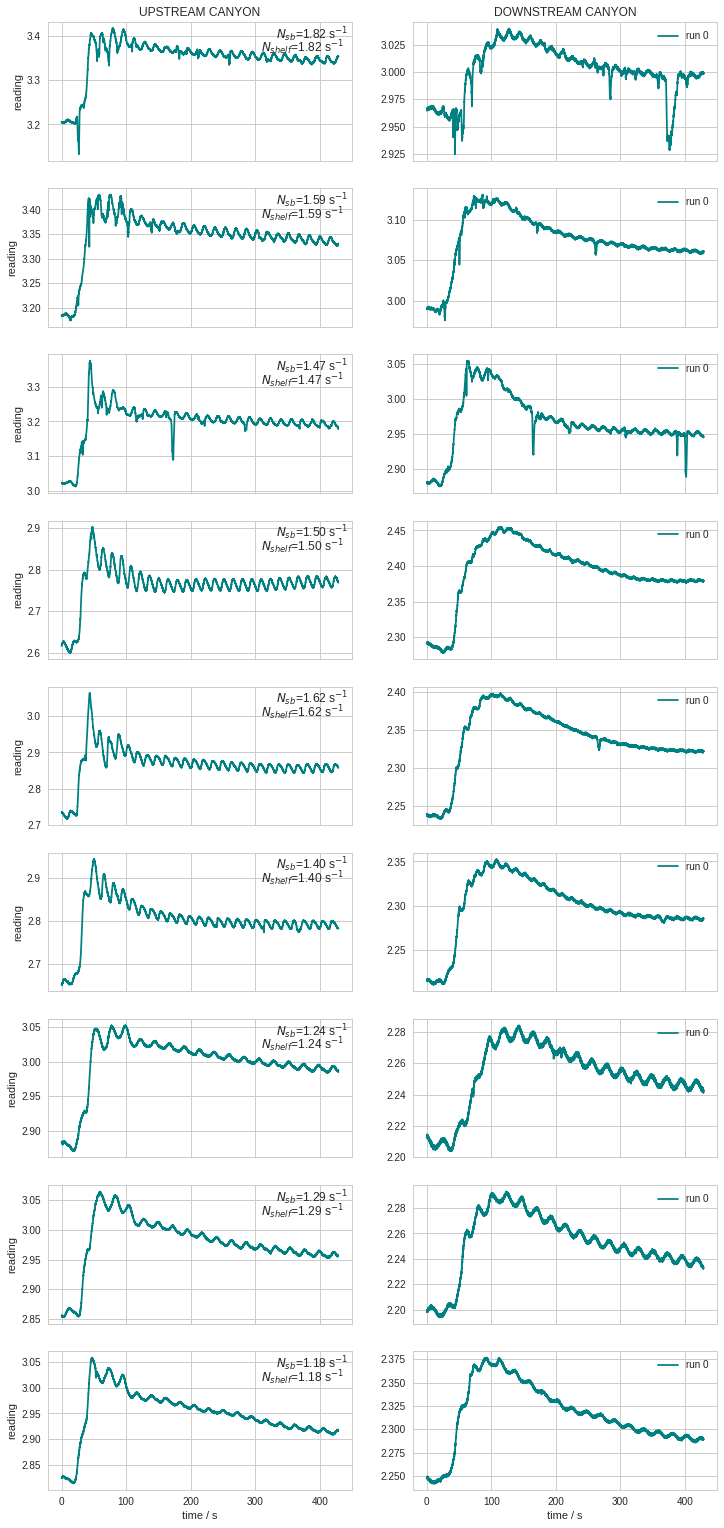

In [7]:
fig, ax = plt.subplots(exp_num, 2, figsize=(12,exp_num*3), sharex=True)

ax[0,0].set_title('UPSTREAM CANYON')
ax[0,1].set_title('DOWNSTREAM CANYON')

for exp, kk in zip(exp_dicts, range(exp_num)):
    
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        time = mat['time']
        ax[kk,0].plot(time,P1,'-',color=col, label='run %d' %ii)
        ax[kk,1].plot(time,P2,'-',color=col, label='run %d' %ii)
        ax[kk,0].text(0.75,0.88,'$N_{sb}$=%1.2f s$^{-1}$' %exp["Nsb"], transform=ax[kk,0].transAxes)
        ax[kk,0].text(0.7,0.78,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax[kk,0].transAxes)
       
    ax[kk,0].set_ylabel('reading')
    ax[kk,1].legend(bbox_to_anchor=(1,1))

ax[kk,0].set_xlabel('time / s')
ax[kk,1].set_xlabel('time / s')


### Density change from initial value

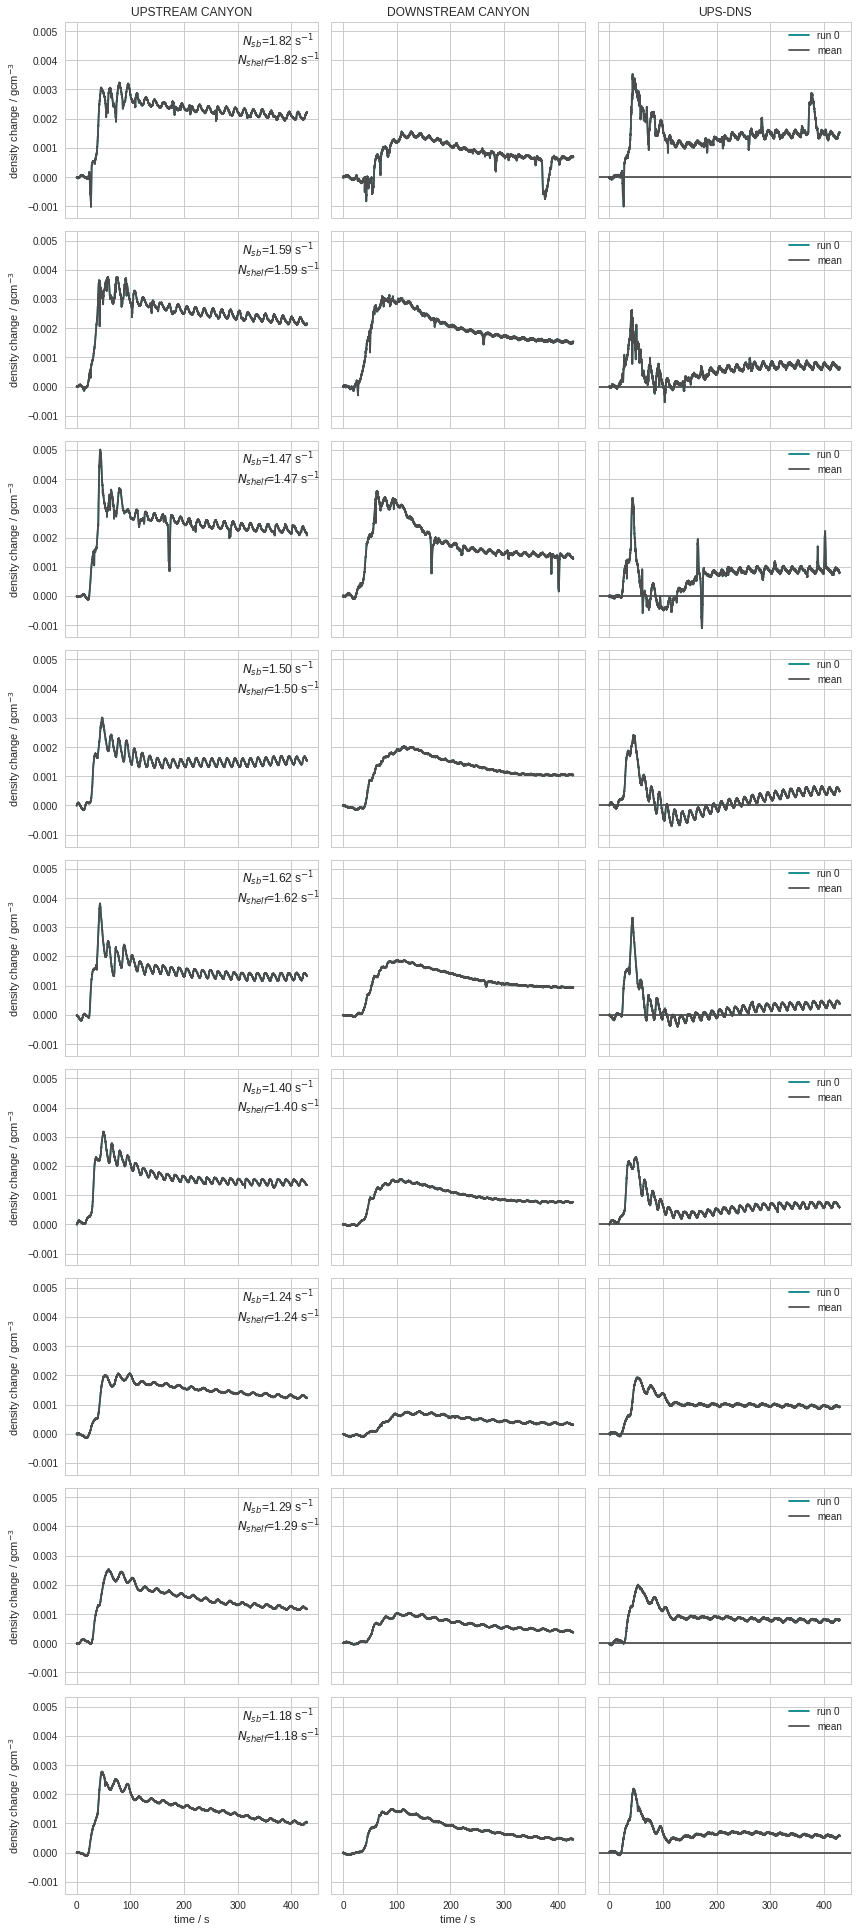

In [8]:
fig, ax = plt.subplots(exp_num, 3, figsize=(12,exp_num*3), sharey=True, sharex=True)

ax[0,0].set_title('UPSTREAM CANYON')
ax[0,1].set_title('DOWNSTREAM CANYON')
ax[0,2].set_title('UPS-DNS')

for exp, kk in zip(exp_dicts, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    for ii,col in zip(range(len(exp['run_files'])),colors):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        ax[kk,0].plot(time, dens1-dens1[0],'-',color=col, label='run %d' %ii)
        ax[kk,1].plot(time, dens2-dens2[0],'-',color=col, label='run %d' %ii)
        ax[kk,2].axhline(0, color='0.3')
        ax[kk,2].plot(time, (dens1-dens1[0])-(dens2-dens2[0]),'-',color=col, label='run %d' %ii)
        ax[kk,0].text(0.70,0.88,'$N_{sb}$=%1.2f s$^{-1}$' %exp["Nsb"], transform=ax[kk,0].transAxes)
        ax[kk,0].text(0.68,0.78,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax[kk,0].transAxes)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
    ax[kk,0].plot(time, avg1/(len(exp['run_files'])),'-',color='0.3', label='mean')
    ax[kk,1].plot(time, avg2/(len(exp['run_files'])),'-',color='0.3', label='mean')
    ax[kk,2].plot(time, avg3/(len(exp['run_files'])),'-',color='0.3', label='mean')    
    ax[kk,0].set_ylabel('density change / gcm$^{-3}$')
    ax[kk,2].legend(bbox_to_anchor=(1,1))

ax[kk,0].set_xlabel('time / s')
ax[kk,1].set_xlabel('time / s')
plt.tight_layout()

### Upstream vs downstream all runs

8.975979010256552
8.975979010256552
8.975979010256552
7.853981633974483
7.853981633974483
7.853981633974483
12.566370614359172
12.566370614359172
12.566370614359172


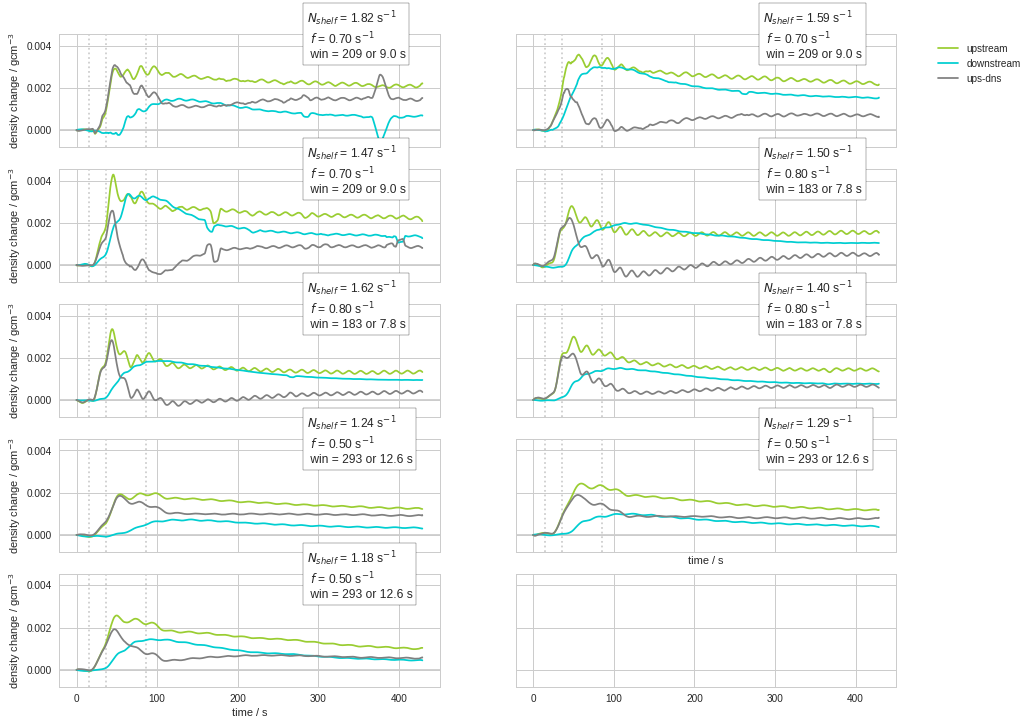

In [9]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(5, 2, figsize=(15,12), sharey=True, sharex=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

for exp, kk, ax in zip(exp_dicts, range(exp_num), axs):
    for ii,col in zip(range(len(exp['run_files'])),colors): 
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        print(inertial_period)
        ax.axhline(0, color='0.8')
        plot_uprofile(ax)
        ax.text(0.65,0.8,'$N_{shelf}$ = %1.2f s$^{-1}$ \n $f$ = %1.2f s$^{-1}$ \n win = %d or %1.1f s' \
                %(exp["Nshelf"],exp["fo"],win, win*dt), transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=1) )
    
        ax.plot(time, ctools.filter_timeseries((dens1-dens1[0]),winlen=win),'-',
                color='yellowgreen', label='upstream')
        ax.plot(time, ctools.filter_timeseries((dens2-dens2[0]),winlen=win),'-',
                color='darkturquoise', label='downstream')
        ax.plot(time, ctools.filter_timeseries((dens1-dens1[0])-(dens2-dens2[0]),winlen=win),
                '-',color='0.5', label='ups-dns')    
    

for ax in [ax0,ax2,ax4,ax6,ax8]:
    ax.set_ylabel('density change / gcm$^{-3}$')
ax7.set_xlabel('time / s')
ax8.set_xlabel('time / s')
ax1.legend(bbox_to_anchor=(1.35,1))

### Max depth of upwelling in upstream canyon

Text(0,0.5,'max $\\Delta \\rho$ canyon / g cm$^{-3}$')

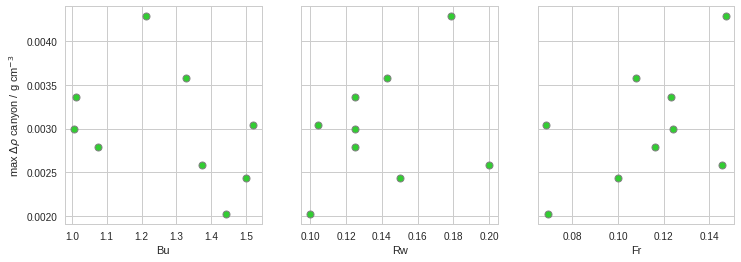

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        W = 5 # cm
        N =((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        Fr = exp["U"]/(N*exp["hsb"])

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        sca = ax1.plot(Bu,(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))),
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))),
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.plot(Fr,(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))),
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 

ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax3.set_xlabel('Fr')
ax1.set_ylabel(r'max $\Delta \rho$ canyon / g cm$^{-3}$')

Text(0,0.5,'Z / cm')

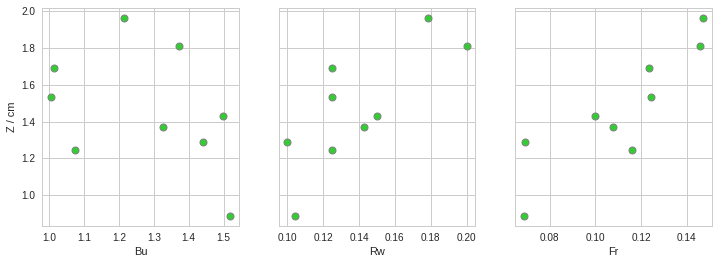

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        W = 5 # cm
        N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        Fr = exp["U"]/(N*exp["hsb"])
  
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        Z = 100*(g/rho0)*(delta_rho/N**2) #cm
        sca = ax1.plot(Bu,Z,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,Z,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.plot(Fr,Z,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 

ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax3.set_xlabel('Fr')
ax1.set_ylabel(r'Z / cm')

0.8874579725918705
1.3699945122941186
1.9613206209984606
1.2482451135168873
1.6907965473539508
1.5318289294945304
1.2865440436883102
1.432432840271947
1.8105877182957175


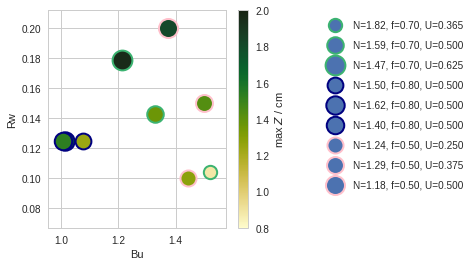

In [32]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        W = 5 # cm
        N =((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        Z = 100*(g/rho0)*(delta_rho/N**2) #cm
        print(Z)
        sca = ax1.scatter(Bu,Rw,
                          s=200*Z,
                          c=Z,
                          cmap=cmo.cm.speed,
                          vmax=2,
                          vmin=0.8,
                          marker='o',edgecolors=exp["color"],linewidth=2, 
                          label=('N=%1.2f, f=%1.2f, U=%1.3f' %(exp["Nshelf"],exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca)
cb.set_label(r'max $Z$ / cm')
ax1.set_xlabel('Bu')
ax1.set_ylabel('Rw')
ax1.legend(bbox_to_anchor=(1.5,1),labelspacing=1)           

The plots above show that Z is porportional to Rw (and Fr) and inversely proportional to Bu, as expected :)

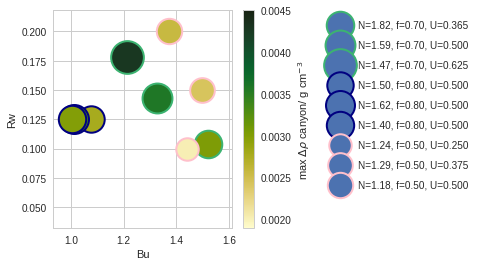

In [28]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        W = 5 # cm
        N =((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        sca = ax1.scatter(Bu,Rw,
                          s=250000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))),
                          c=np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win)),
                          cmap=cmo.cm.speed,
                          vmax=0.0045,
                          vmin=0.0019,
                          marker='o',edgecolors=exp["color"],linewidth=2, 
                          label=('N=%1.2f, f=%1.2f, U=%1.3f' %(exp["Nshelf"],exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca)
cb.set_label(r'max $\Delta \rho$ canyon/ g cm$^{-3}$')
ax1.set_xlabel('Bu')
ax1.set_ylabel('Rw')
ax1.legend(bbox_to_anchor=(1.5,1),labelspacing=1)           

Same but for the maximum density difference

### Depth of upwelling in anomaly (upstream-downstream)

Text(0,0.5,'Z / cm')

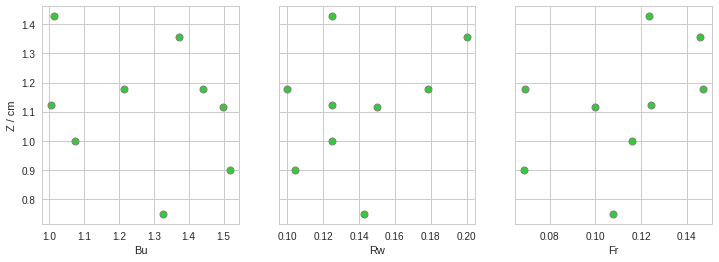

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        W = 5 # cm
        N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        Fr = exp["U"]/(N*exp["hsb"])
  
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho = 1000*(np.max((ctools.filter_timeseries(dens1-dens1[0],winlen=win)-
                                  ctools.filter_timeseries(dens2-dens2[0],winlen=win)))) # kg/m^3
        Z = 100*(g/rho0)*(delta_rho/N**2) #cm
        sca = ax1.plot(Bu,Z,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,Z,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.plot(Fr,Z,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 

ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax3.set_xlabel('Fr')
ax1.set_ylabel(r'Z / cm')

0.9007989626956988
0.7484479846350536
1.177955787884122
0.9975475471039834
1.4277744387294546
1.1224862449752666
1.1781022049351844
1.1146030983706097
1.3553072617895765


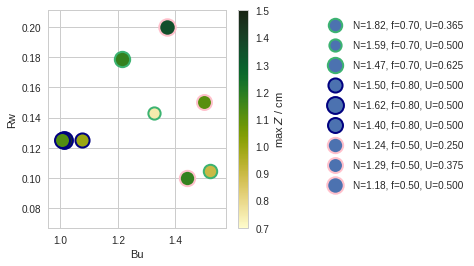

In [36]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        W = 5 # cm
        N =((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho = 1000*(np.max((ctools.filter_timeseries(dens1-dens1[0],winlen=win)-
                          ctools.filter_timeseries(dens2-dens2[0],winlen=win)))) # kg/m^3
        Z = 100*(g/rho0)*(delta_rho/N**2) #cm
        print(Z)
        sca = ax1.scatter(Bu,Rw,
                          s=200*Z,
                          c=Z,
                          cmap=cmo.cm.speed,
                          vmax=1.5,
                          vmin=0.7,
                          marker='o',edgecolors=exp["color"],linewidth=2, 
                          label=('N=%1.2f, f=%1.2f, U=%1.3f' %(exp["Nshelf"],exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca)
cb.set_label(r'max $Z$ / cm')
ax1.set_xlabel('Bu')
ax1.set_ylabel('Rw')
ax1.legend(bbox_to_anchor=(1.5,1),labelspacing=1)           

Here it is not so clear. From the scatter plot above this one the dependence on Ro looks clear and for Bu there are 3 lines that decrease with increasing Bu but I don;t see that so clear in here.